# To identify/classify Spam and Non-Spam Emails

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

In [2]:
Data = pd.read_csv(r'C:\Users\Dell\GitHub Projects\Spam-Ham Project/Spam-Ham Data.csv')

In [3]:
Data['text'] = Data['text'].str.lower()

In [4]:
Data.head()

,text,spam
0,subject: naturally irresistible your corporate...,1
1,subject: the stock trading gunslinger fanny i...,1
2,subject: unbelievable new homes made easy im ...,1
3,subject: 4 color printing special request add...,1
4,"subject: do not have money , get software cds ...",1


In [5]:
Data.shape

(5728, 2)

In [6]:
Data.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
#To check for Null values, if any
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [8]:
spam = Data[Data['spam']== 1]
spam

,text,spam
0,subject: naturally irresistible your corporate...,1
1,subject: the stock trading gunslinger fanny i...,1
2,subject: unbelievable new homes made easy im ...,1
3,subject: 4 color printing special request add...,1
4,"subject: do not have money , get software cds ...",1
...,...,...
1363,subject: are you ready to get it ? hello ! v...,1
1364,subject: would you like a $ 250 gas card ? do...,1
1365,"subject: immediate reply needed dear sir , i...",1
1366,subject: wanna see me get fisted ? fist bang...,1


In [9]:
Data['text'][0]

"subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [10]:
ham = Data[Data['spam']== 0]
ham

,text,spam
1368,"subject: hello guys , i ' m "" bugging you "" f...",0
1369,subject: sacramento weather station fyi - - ...,0
1370,subject: from the enron india newsdesk - jan 1...,0
1371,subject: re : powerisk 2001 - your invitation ...,0
1372,subject: re : resco database and customer capt...,0
...,...,...
5723,subject: re : research and development charges...,0
5724,"subject: re : receipts from visit jim , than...",0
5725,subject: re : enron case study update wow ! a...,0
5726,"subject: re : interest david , please , call...",0


In [11]:
# Percentage = Total number of Spam/Ham Emails divided by Total number of Emails multiplied by 100
print('Spam Percentage = ', (len(spam)/len(Data))*100,'%')

Spam Percentage =  23.88268156424581 %


In [12]:
# Percentage = Total number of Spam/Ham Emails divided by Total number of Emails multiplied by 100
print('Ham Percentage = ', (len(ham)/len(Data))*100,'%')

Ham Percentage =  76.11731843575419 %


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Number of Spams v/s Number of Hams'}, xlabel='spam', ylabel='count'>

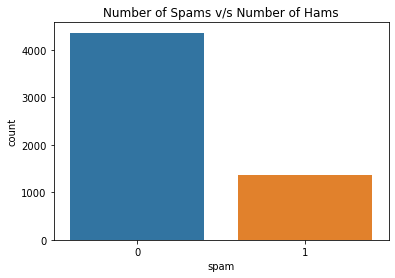

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('Number of Spams v/s Number of Hams')
sns.countplot(Data['spam'],label = 'Number of Spams v/s Number of Hams')

In [14]:
X = Data['text']
y = Data['spam']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [16]:
x_train.shape

(4582,)

In [17]:
x_test.shape

(1146,)

In [18]:
y_train.shape

(4582,)

In [19]:
y_test.shape

(1146,)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [21]:
heading = vectorizer.get_feature_names()
len(heading)

33731

In [22]:
x_train_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
x_train_vectorized.shape

(4582, 33731)

In [24]:
x_test_vectorized.toarray()

array([[1, 2, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
x_test_vectorized.shape

(1146, 33731)

In [26]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train_vectorized,y_train)

MultinomialNB()

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
y_test_predict = classifier.predict(x_test_vectorized)

<AxesSubplot:>

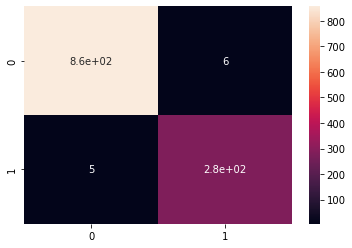

In [28]:
Matrix = confusion_matrix(y_test,y_test_predict)
sns.heatmap(Matrix,annot = True)

In [29]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       863
           1       0.98      0.98      0.98       283

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [30]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, y_test_predict)
Accuracy

0.9904013961605584

In [33]:
import pickle
pickle.dump(vectorizer,open('count_vectorizer.pkl','wb'))
pickle.dump(classifier,open('model.pkl','wb'))